In [85]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#读取数据文件
dataframe_info = pd.read_excel('/Users/zhoujianjun/Downloads/workplace/2020-05-20/data/data.xlsx')

print(dataframe_info.head())

   编号     身高    体重        BMI   肺活量  50米跑  立定跳远  坐位体前屈  800米跑  一分钟仰卧起坐    总分
0   1  161.9  80.1  30.558977  3034  10.7   181    5.4    261       36  61.8
1   2  167.5  59.9  21.349967  2130   8.9   183   15.3    228       32  76.7
2   3  164.7  56.2  20.718061  1987  11.1   182   20.1    228       25  63.1
3   4  156.0  47.7  19.600592  1723   9.3   160   21.4    225       25  64.7
4   5  163.4  53.5  20.037783  2680   7.5   158   19.6    232       20  78.4


In [74]:
#从身高到一分钟仰卧起坐数据转换为分类数据
def function_getClass(parm_dataframe,parm_column,parm_dict):
    """
    传入参数：parm_dataframe:要处理数据框，parm_column:要处理的列,parm_list:处理规则
    函数目的：做数值型数据分类
    """
    list_limit = list(parm_dict.keys())
    list_rule = list(map(lambda str_rule
                               :parm_column+str_rule
                               ,list(parm_dict.values())+ ["优秀"]))
    parm_dataframe["结果"] = pd.DataFrame(np.select([(parm_dataframe[parm_column]<=list_limit[0])
                                ,((parm_dataframe[parm_column]>list_limit[0])&(parm_dataframe[parm_column]<=list_limit[1]))
                                ,((parm_dataframe[parm_column]>list_limit[1])&(parm_dataframe[parm_column]<=list_limit[2]))
                                ,(parm_dataframe[parm_column]>=list_limit[2])]
                                ,list_rule))
    dataframe_result = pd.DataFrame(list(zip(dataframe_info["编号"]
                                            ,dataframe_info[parm_column]
                                            ,dataframe_info["结果"])))
    dataframe_result.columns = ["编号"] + [parm_column] + [parm_column+"结果"] 
    return dataframe_result
    

In [97]:
#统计各项不及格，及格，良好和优秀的人数

def function_getBar(parm_DataFrame):
    """
    传入参数：parm_dataframe:要进行画图的数据框
    函数目的：得出柱状图的结果
    """
    #得出统计结果
    static_result = parm_DataFrame.iloc[:,0].groupby(parm_DataFrame.iloc[:,-1]).count()
    #画图
    name_list = list(static_result.index)
    num_list = list(pd.DataFrame(static_result).iloc[:,0])
    #定义图片名称
    str_titile = parm_DataFrame.columns[1] + "统计结果"
    plt.title(str_titile)
    plt.bar(range(len(num_list)), num_list, color='rgb', tick_label=name_list)
    plt.show()
    print("输出成功")
    
    return None


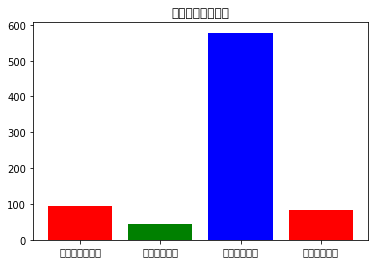

输出成功


In [98]:
#画柱状图
dataframe_rs = function_getClass(dataframe_info,"立定跳远",{151:"不及格",181:"及格",195:"良好"})
function_getBar(dataframe_rs)
